# ใช้งาน TensorFlow Model - บน Anacona
load model filename:  <b>digitmodel.h5</b>

In [1]:
from tensorflow.keras.models import load_model

model = load_model('digitmodel.h5')    # Load model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

(3, 3, 1, 32)
[[-0.03  0.08  0.14]
 [-0.06  0.21 -0.  ]
 [ 0.13  0.08  0.07]]


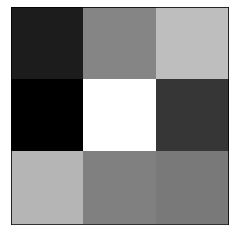

In [3]:
# Kernel for Convo Only!
import matplotlib.pyplot as plt

model_layer_idx = 0

kernels, biases = model.layers[model_layer_idx].get_weights()
print(kernels.shape)

kernel_idx = 0                ##  0 1 2 3 ...
kernel_i = kernels[:, :, 0 , kernel_idx]
print(kernel_i.round(2))

plt.imshow(kernel_i, cmap=plt.cm.gray) 
plt.xticks([])
plt.yticks([])
plt.show()

## Read Image and predict

img shape: (28, 28, 1)
max pixel value: 254.97452
Expandim: (1, 28, 28, 1)
1/1 [==============================] - 0s 142ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]

Predicted Number= 2


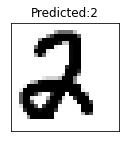

In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import rgb_to_grayscale
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

filename = 'data/digit2-1.png'          # Digit image to predict
# filename = 'data/digit4-1.png'

img = load_img(filename, target_size=(28, 28))
display(img)
img = ImageOps.invert(img)      # invert
img = img_to_array(img)
img = rgb_to_grayscale(img)

print('img shape:', img.shape)
print('max pixel value:',np.max(img))

img /= 255.0            # Normalize

img = np.expand_dims(img, axis=0)
print('Expandim:', img.shape)

y_pred = model.predict(img)
print(y_pred.round(3))

predicted = np.argmax(y_pred, -1)
# predicted = np.argmax(y_pred, axis=1)
print('\nPredicted Number=', predicted[0])

plt.figure(figsize=(2, 2))
plt.imshow(img[0].reshape(28,28), cmap=plt.cm.gray_r)
plt.title('Predicted:{}'. format(predicted[0]))
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
# Clean Code

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import rgb_to_grayscale
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

filename = 'data/digit2-1.png'          # Digit image to predict
#filename = 'data/digit4-1.png'

img = load_img(filename, target_size=(28, 28))
display(img)
img = ImageOps.invert(img)      # invert
img = img_to_array(img)
img = rgb_to_grayscale(img)

img /= 255.0            # Normalize
img = np.expand_dims(img, axis=0)

y_pred = model.predict(img)

predicted = np.argmax(y_pred, -1)
# predicted = np.argmax(y_pred, axis=1)
print('\nPredicted Number=', predicted[0])

1/1 [==============================] - 0s 21ms/step

Predicted Number= 2


## Feature maps

In [9]:
from tensorflow.keras.models import Model

model_layer_idx = 0           # model layer id (0=first layer)
md = Model(inputs=model.inputs, outputs=model.layers[model_layer_idx].output)

feature_maps = md.predict(img)
feature_maps.shape

1/1 [==============================] - 0s 43ms/step


(1, 26, 26, 32)

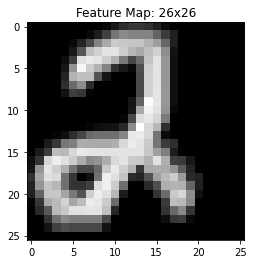

In [10]:
sample_idx = 0      # sample id
fea_idx = 0        # index of Feature Map 
feature_map_i = feature_maps[sample_idx, :, :, fea_idx]

plt.title(f'Feature Map: {feature_map_i.shape[0]}x{feature_map_i.shape[0]}')
plt.imshow(feature_map_i, cmap=plt.cm.gray)
plt.show()

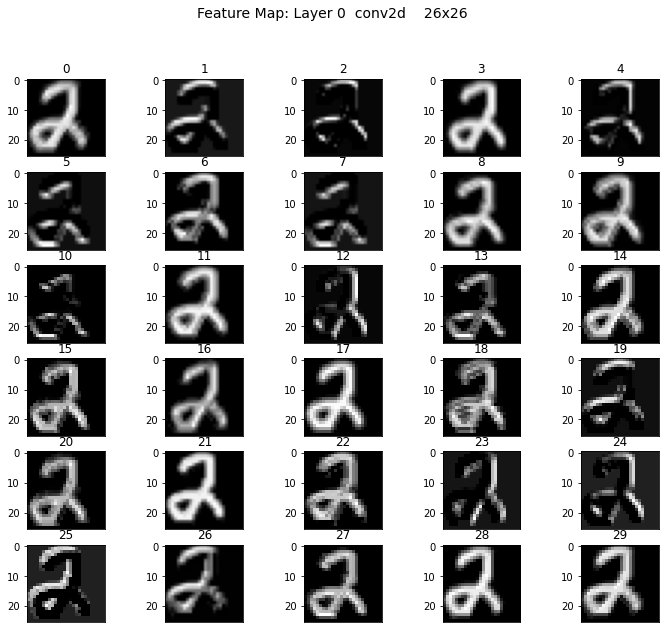

In [11]:
nplots = 30
layername = model.layers[model_layer_idx].name

fig = plt.figure(figsize=(12, 10)) 
fig.suptitle(f'Feature Map: Layer {model_layer_idx}  {layername} \
   {feature_map_i.shape[0]}x{feature_map_i.shape[0]}',
             fontsize=14)

for j in range(nplots):
    plt.subplot(6, 5, j+1)
    plt.imshow(feature_maps[sample_idx, :, :, j], cmap=plt.cm.gray)
    plt.title(j)
    plt.xticks([]) # ; plt.yticks([])

plt.show()

# ใช้ TensorFlow Model - บน Colab 

In [ ]:
# Colab
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

!ls '/content/drive/MyDrive/Colab Notebooks/'

In [ ]:
from tensorflow.keras.models import load_model

gpath = '/content/drive/MyDrive/Colab Notebooks/'

model = load_model(gpath + 'digitmodel.h5') 
model.summary()

## Upload a digit image to predict

In [ ]:
# Upload
from google.colab import files

uploaded = files.upload()

filename = next(iter(uploaded))
print(filename)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import rgb_to_grayscale

gpath = '/content/drive/MyDrive/Colab Notebooks/'

img = load_img(filename, target_size=(28, 28))
img

In [ ]:
from PIL import Image, ImageOps

img = load_img(filename, target_size=(28, 28))

img = ImageOps.invert(img)
img = img_to_array(img)
img = rgb_to_grayscale(img)

print('shape=',img.shape)
# print('max pixel value=',np.max(img))

img /= 255.0

img = np.expand_dims(img, axis=0)
img.shape

y_pred = model.predict(img)

predicted = np.argmax(y_pred, -1) 

plt.figure(figsize=(2, 2))
plt.imshow(img[0].reshape(28,28), cmap=plt.cm.gray_r)
plt.title('Predicted:{}'. format(predicted[0]))
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
display(img)